### Importations

In [1]:
# Data loading and manipulation
import pandas as pd
import numpy as np
# K-Means clustering algorithm
from sklearn.cluster import KMeans
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Places the plots in the Jupyter Notebook
%matplotlib inline
# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn import preprocessing
# Keep everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

import os
import bandits as ba

## Chargement données

In [2]:
path ='/home/agary/Documents/Data/npb_fast/02_remove_wm/'
f1 = 'npb_graoully-'
f2 = ['1','1','1','1','1','2','3','6','10','10','11','11','12','12','13','13','13','13','14','15','16']
f3 = '.nancy.grid5000.fr_'
f4 = ['1637601437','1637609938','1637875436','1637899219','1637920836','1637601340','1637525287','1637920832','1637525761','1637601438','1637609677','1637875436','1637898864','1637899935','1636306023','1637525287','1637899037','1637899639','1637920837','1637609637','1637875436']
f5 = '_cleaned.csv'


filename = f1+f2[0]+f3+f4[0]+f5
df_t = pd.read_csv(path + filename, sep=' ')
df = df_t.loc[df_t['fmax']==2400000]

for i in range(1,len(f2)):
    filename = f1+f2[i]+f3+f4[i]+f5
    temp = pd.read_csv(path + filename, sep=' ')
    temp = temp.loc[temp['fmax']==2400000]
    
    df = pd.concat([df,temp])

df.head()

hostname fullname nproc  duration   startTime  \
12  graoully-1.nancy.grid5000.fr  bt-C-64    64     23.23  1637602884   
25  graoully-1.nancy.grid5000.fr  cg-C-64    64      6.00  1637604082   
38  graoully-1.nancy.grid5000.fr  ep-C-64    64      3.73  1637605254   
51  graoully-1.nancy.grid5000.fr  lu-C-64    64     16.35  1637606624   
64  graoully-1.nancy.grid5000.fr  is-D-64    64     12.10  1637608096   

       endTime     fmin     fmax  \
12  1637602976  1200000  2400000   
25  1637604157  1200000  2400000   
38  1637605326  1200000  2400000   
51  1637606709  1200000  2400000   
64  1637608189  1200000  2400000   

                                             hostlist  \
12  graoully-1.nancy.grid5000.fr;graoully-16.nancy...   
25  graoully-1.nancy.grid5000.fr;graoully-16.nancy...   
38  graoully-1.nancy.grid5000.fr;graoully-16.nancy...   
51  graoully-1.nancy.grid5000.fr;graoully-16.nancy...   
64  graoully-1.nancy.grid5000.fr;graoully-16.nancy...   

                                       basename        energy       time  \
12  npb_graoully-1.nancy.grid5000.fr_1637601437  23140.481485  28.120202   
25  npb_graoully-1.nancy.grid5000.fr_1637601437   7856.758040  10.009967   
38  npb_graoully-1.nancy.grid5000.fr_1637601437   4593.884241   8.006584   
51  npb_graoully-1.nancy.grid5000.fr_1637601437  16149.798385  20.132628   
64  npb_graoully-1.nancy.grid5000.fr_1637601437  20801.114282  29.032725   

    mean_power  median_power  
12  206.854545         220.5  
25  189.400000         233.0  
38  153.363636         144.0  
51  197.035714         214.0  
64  178.704348         189.0

## Clustering avec valeurs moyennes :

On teste en utilisant les valeurs moyennes pour chaque covariable :

In [3]:
m,n = df.shape
machines = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
t = 10 # temps sur lequel les données sont récoltées pour le clustering
dataframe = pd.DataFrame()
list_server = []
list_app = []
list_duration = []
list_basename = []

for i in range(m):
    
    basename = df.iat[i,9]
    path_temp = path + basename + '_mojitos/' # creation du chemin jusqu'au fichier correspondant
    key = df.iat[i,4]
    app = df.iat[i,1]
    
    
    for j in machines :
        
        name = 'graoully-' + j + '.nancy.grid5000.fr_' + app + '_' + str(key)
        filename = path_temp + name
        
        # test si fichier existe : si oui : manip :
        
        if os.path.exists(filename) :
            dt = pd.read_csv(filename,sep=' ')
            time = dt.iat[0,0]
            end = dt.iat[-1,0]
            dt_0 = dt[dt['#timestamp']<=time+t]
            dt_partial = dt[dt['#timestamp']>=time+4]
            dt_mean = dt_partial.mean()
            
            dataframe = dataframe.append(dt_mean,ignore_index=True)
            list_server.append(j)
            list_app.append(app)
            list_duration.append(end-time)
            list_basename.append(basename)
            
            
dataframe['server'] = list_server
dataframe['app'] = list_app
dataframe['duration'] = list_duration
dataframe['basename'] = list_basename
dataframe = dataframe.drop(['#timestamp'],axis=1)

dataframe

instructions  cache_references  cache_misses    cache_node       rxp  \
0     7.126050e+09      2.063024e+07  1.068034e+07  6.790390e+06  5.897119   
1     7.120380e+09      2.039575e+07  1.062264e+07  6.761612e+06  5.599174   
2     7.100371e+09      2.039909e+07  1.061428e+07  6.753175e+06  5.565574   
3     7.141135e+09      2.043908e+07  1.062542e+07  6.751956e+06  5.698347   
4     4.928587e+09      3.244595e+07  5.439335e+06  4.103259e+06  1.838235   
...            ...               ...           ...           ...       ...   
2479  4.708899e+09      7.206684e+07  1.421589e+07  1.065412e+07  1.811594   
2480  3.635065e+09      2.254729e+07  1.014367e+07  6.673391e+06  1.364000   
2481  3.709421e+09      2.253363e+07  1.013092e+07  6.660942e+06  1.365462   
2482  3.632964e+09      2.242635e+07  1.032884e+07  6.890166e+06  1.318725   
2483  3.683452e+09      2.248119e+07  1.034567e+07  6.844611e+06  1.286853   

             rxb       txp         txb          irxp          irxb  \
0     477.176955  0.506173  264.473251  18262.230453  8.380612e+06   
1     429.239669  0.148760  119.648760  18166.024793  8.336804e+06   
2     426.286885  0.184426  122.409836  18175.151639  8.341428e+06   
3     448.190083  0.322314  138.764463  18165.913223  8.336802e+06   
4     259.367647  1.382353  569.926471  76533.529412  3.552697e+07   
...          ...       ...         ...           ...           ...   
2479  141.192029  0.434783  233.840580   6306.420290  3.035007e+06   
2480  786.856000  0.636000  176.648000  35175.864000  1.811652e+07   
2481  778.650602  0.598394  264.718876  34950.465863  1.799941e+07   
2482  759.254980  0.581673  261.529880  34477.760956  1.775560e+07   
2483  179.031873  0.490040  257.422311  34510.035857  1.777199e+07   

              itxp          itxb    package-00         dram0    package-11  \
0     18262.152263  8.380598e+06  5.892214e+06  1.160668e+06  5.789349e+06   
1     18166.004132  8.336807e+06  5.693828e+06  1.183948e+06  5.420157e+06   
2     18174.954918  8.341057e+06  5.612755e+06  1.140862e+06  5.696051e+06   
3     18165.979339  8.336810e+06  5.669167e+06  1.174901e+06  5.553311e+06   
4     76524.588235  3.552228e+07  5.655735e+06  9.468891e+05  5.502952e+06   
...            ...           ...           ...           ...           ...   
2479   6306.108696  3.034788e+06  7.075694e+06  1.800237e+06  6.920920e+06   
2480  34690.348000  1.786533e+07  4.886853e+06  8.968850e+05  4.622285e+06   
2481  34954.321285  1.800127e+07  4.739233e+06  9.022382e+05  4.504688e+06   
2482  34738.932271  1.789083e+07  4.688242e+06  8.643705e+05  4.378416e+06   
2483  34728.621514  1.788512e+07  4.845837e+06  8.937927e+05  4.688433e+06   

             dram1 server      app   duration  \
0     1.197492e+06      1  bt-C-64  28.200002   
1     1.194327e+06      3  bt-C-64  28.200025   
2     1.188244e+06      4  bt-C-64  28.300036   
3     1.190700e+06     16  bt-C-64  28.200036   
4     1.012224e+06      1  cg-C-64  10.800002   
...            ...    ...      ...        ...   
2479  1.796543e+06     16  mg-D-64  31.499966   
2480  8.805950e+05      6  is-D-64  28.900029   
2481  8.882513e+05      7  is-D-64  28.900032   
2482  9.199421e+05      8  is-D-64  29.000056   
2483  8.489465e+05     16  is-D-64  29.000046   

                                          basename  
0      npb_graoully-1.nancy.grid5000.fr_1637601437  
1      npb_graoully-1.nancy.grid5000.fr_1637601437  
2      npb_graoully-1.nancy.grid5000.fr_1637601437  
3      npb_graoully-1.nancy.grid5000.fr_1637601437  
4      npb_graoully-1.nancy.grid5000.fr_1637601437  
...                                            ...  
2479  npb_graoully-16.nancy.grid5000.fr_1637875436  
2480  npb_graoully-16.nancy.grid5000.fr_1637875436  
2481  npb_graoully-16.nancy.grid5000.fr_1637875436  
2482  npb_graoully-16.nancy.grid5000.fr_1637875436  
2483  npb_graoully-16.nancy.grid5000.fr_1637875436  

[2484 rows x 20 columns]

In [4]:
dt_final = dataframe.drop(['server','app','basename'],axis=1)
dt_final

instructions  cache_references  cache_misses    cache_node       rxp  \
0     7.126050e+09      2.063024e+07  1.068034e+07  6.790390e+06  5.897119   
1     7.120380e+09      2.039575e+07  1.062264e+07  6.761612e+06  5.599174   
2     7.100371e+09      2.039909e+07  1.061428e+07  6.753175e+06  5.565574   
3     7.141135e+09      2.043908e+07  1.062542e+07  6.751956e+06  5.698347   
4     4.928587e+09      3.244595e+07  5.439335e+06  4.103259e+06  1.838235   
...            ...               ...           ...           ...       ...   
2479  4.708899e+09      7.206684e+07  1.421589e+07  1.065412e+07  1.811594   
2480  3.635065e+09      2.254729e+07  1.014367e+07  6.673391e+06  1.364000   
2481  3.709421e+09      2.253363e+07  1.013092e+07  6.660942e+06  1.365462   
2482  3.632964e+09      2.242635e+07  1.032884e+07  6.890166e+06  1.318725   
2483  3.683452e+09      2.248119e+07  1.034567e+07  6.844611e+06  1.286853   

             rxb       txp         txb          irxp          irxb  \
0     477.176955  0.506173  264.473251  18262.230453  8.380612e+06   
1     429.239669  0.148760  119.648760  18166.024793  8.336804e+06   
2     426.286885  0.184426  122.409836  18175.151639  8.341428e+06   
3     448.190083  0.322314  138.764463  18165.913223  8.336802e+06   
4     259.367647  1.382353  569.926471  76533.529412  3.552697e+07   
...          ...       ...         ...           ...           ...   
2479  141.192029  0.434783  233.840580   6306.420290  3.035007e+06   
2480  786.856000  0.636000  176.648000  35175.864000  1.811652e+07   
2481  778.650602  0.598394  264.718876  34950.465863  1.799941e+07   
2482  759.254980  0.581673  261.529880  34477.760956  1.775560e+07   
2483  179.031873  0.490040  257.422311  34510.035857  1.777199e+07   

              itxp          itxb    package-00         dram0    package-11  \
0     18262.152263  8.380598e+06  5.892214e+06  1.160668e+06  5.789349e+06   
1     18166.004132  8.336807e+06  5.693828e+06  1.183948e+06  5.420157e+06   
2     18174.954918  8.341057e+06  5.612755e+06  1.140862e+06  5.696051e+06   
3     18165.979339  8.336810e+06  5.669167e+06  1.174901e+06  5.553311e+06   
4     76524.588235  3.552228e+07  5.655735e+06  9.468891e+05  5.502952e+06   
...            ...           ...           ...           ...           ...   
2479   6306.108696  3.034788e+06  7.075694e+06  1.800237e+06  6.920920e+06   
2480  34690.348000  1.786533e+07  4.886853e+06  8.968850e+05  4.622285e+06   
2481  34954.321285  1.800127e+07  4.739233e+06  9.022382e+05  4.504688e+06   
2482  34738.932271  1.789083e+07  4.688242e+06  8.643705e+05  4.378416e+06   
2483  34728.621514  1.788512e+07  4.845837e+06  8.937927e+05  4.688433e+06   

             dram1   duration  
0     1.197492e+06  28.200002  
1     1.194327e+06  28.200025  
2     1.188244e+06  28.300036  
3     1.190700e+06  28.200036  
4     1.012224e+06  10.800002  
...            ...        ...  
2479  1.796543e+06  31.499966  
2480  8.805950e+05  28.900029  
2481  8.882513e+05  28.900032  
2482  9.199421e+05  29.000056  
2483  8.489465e+05  29.000046  

[2484 rows x 17 columns]

Méthode du coude pour le nombre de clusters :

In [5]:
k_values = range(1, 10)

k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# comparaison scores

scores = [-k_mean_models[i].fit(dt_final).score(dt_final) for i, model in enumerate(k_mean_models)]

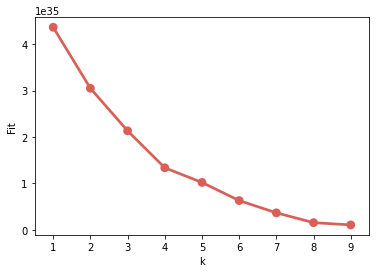

In [6]:
ax = sns.pointplot(x=list(k_values),y=scores);
ax.set(xlabel='k',ylabel='Fit');


Suite à la méthode du coude : clustering à 8 clusters (nombre d'application) :

In [7]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dt_final);

In [8]:
dataframe['kmeans_labels'] = kmeans.labels_

In [9]:
dataframe

instructions  cache_references  cache_misses    cache_node       rxp  \
0     7.126050e+09      2.063024e+07  1.068034e+07  6.790390e+06  5.897119   
1     7.120380e+09      2.039575e+07  1.062264e+07  6.761612e+06  5.599174   
2     7.100371e+09      2.039909e+07  1.061428e+07  6.753175e+06  5.565574   
3     7.141135e+09      2.043908e+07  1.062542e+07  6.751956e+06  5.698347   
4     4.928587e+09      3.244595e+07  5.439335e+06  4.103259e+06  1.838235   
...            ...               ...           ...           ...       ...   
2479  4.708899e+09      7.206684e+07  1.421589e+07  1.065412e+07  1.811594   
2480  3.635065e+09      2.254729e+07  1.014367e+07  6.673391e+06  1.364000   
2481  3.709421e+09      2.253363e+07  1.013092e+07  6.660942e+06  1.365462   
2482  3.632964e+09      2.242635e+07  1.032884e+07  6.890166e+06  1.318725   
2483  3.683452e+09      2.248119e+07  1.034567e+07  6.844611e+06  1.286853   

             rxb       txp         txb          irxp          irxb  \
0     477.176955  0.506173  264.473251  18262.230453  8.380612e+06   
1     429.239669  0.148760  119.648760  18166.024793  8.336804e+06   
2     426.286885  0.184426  122.409836  18175.151639  8.341428e+06   
3     448.190083  0.322314  138.764463  18165.913223  8.336802e+06   
4     259.367647  1.382353  569.926471  76533.529412  3.552697e+07   
...          ...       ...         ...           ...           ...   
2479  141.192029  0.434783  233.840580   6306.420290  3.035007e+06   
2480  786.856000  0.636000  176.648000  35175.864000  1.811652e+07   
2481  778.650602  0.598394  264.718876  34950.465863  1.799941e+07   
2482  759.254980  0.581673  261.529880  34477.760956  1.775560e+07   
2483  179.031873  0.490040  257.422311  34510.035857  1.777199e+07   

              itxp          itxb    package-00         dram0    package-11  \
0     18262.152263  8.380598e+06  5.892214e+06  1.160668e+06  5.789349e+06   
1     18166.004132  8.336807e+06  5.693828e+06  1.183948e+06  5.420157e+06   
2     18174.954918  8.341057e+06  5.612755e+06  1.140862e+06  5.696051e+06   
3     18165.979339  8.336810e+06  5.669167e+06  1.174901e+06  5.553311e+06   
4     76524.588235  3.552228e+07  5.655735e+06  9.468891e+05  5.502952e+06   
...            ...           ...           ...           ...           ...   
2479   6306.108696  3.034788e+06  7.075694e+06  1.800237e+06  6.920920e+06   
2480  34690.348000  1.786533e+07  4.886853e+06  8.968850e+05  4.622285e+06   
2481  34954.321285  1.800127e+07  4.739233e+06  9.022382e+05  4.504688e+06   
2482  34738.932271  1.789083e+07  4.688242e+06  8.643705e+05  4.378416e+06   
2483  34728.621514  1.788512e+07  4.845837e+06  8.937927e+05  4.688433e+06   

             dram1 server      app   duration  \
0     1.197492e+06      1  bt-C-64  28.200002   
1     1.194327e+06      3  bt-C-64  28.200025   
2     1.188244e+06      4  bt-C-64  28.300036   
3     1.190700e+06     16  bt-C-64  28.200036   
4     1.012224e+06      1  cg-C-64  10.800002   
...            ...    ...      ...        ...   
2479  1.796543e+06     16  mg-D-64  31.499966   
2480  8.805950e+05      6  is-D-64  28.900029   
2481  8.882513e+05      7  is-D-64  28.900032   
2482  9.199421e+05      8  is-D-64  29.000056   
2483  8.489465e+05     16  is-D-64  29.000046   

                                          basename  kmeans_labels  
0      npb_graoully-1.nancy.grid5000.fr_1637601437              0  
1      npb_graoully-1.nancy.grid5000.fr_1637601437              0  
2      npb_graoully-1.nancy.grid5000.fr_1637601437              0  
3      npb_graoully-1.nancy.grid5000.fr_1637601437              0  
4      npb_graoully-1.nancy.grid5000.fr_1637601437              0  
...                                            ...            ...  
2479  npb_graoully-16.nancy.grid5000.fr_1637875436              0  
2480  npb_graoully-16.nancy.grid5000.fr_1637875436              0  
2481  npb_graoully-16.nancy.grid5000.fr_1637875436              0  
2482  npb_graoully-16.

Répartition des clusters :

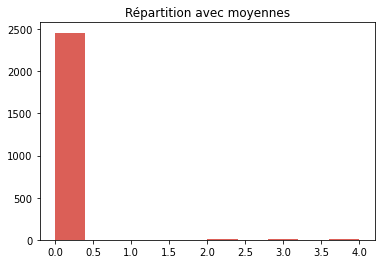

In [11]:
plt.hist(kmeans.labels_);
plt.title('Répartition avec moyennes');

## Test clustering avec valeur médiane :

In [12]:
m,n = df.shape
machines = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
t = 10 # temps sur lequel les données sont récoltées pour le clustering
dataframe0 = pd.DataFrame()
list_server = []
list_app = []
list_duration = []
list_basename = []

for i in range(m):
    
    basename = df.iat[i,9]
    path_temp = path + basename + '_mojitos/' # creation du chemin jusqu'au fichier correspondant
    key = df.iat[i,4]
    app = df.iat[i,1]
    
    for j in machines :
        
        name = 'graoully-' + j + '.nancy.grid5000.fr_' + app + '_' + str(key)
        filename = path_temp + name
        
        # test si fichier existe : si oui : manip :
        
        if os.path.exists(filename) :
            dt = pd.read_csv(filename,sep=' ')
            time = dt.iat[0,0]
            end = dt.iat[-1,0]
            dt_0 = dt[dt['#timestamp']<=time+t]
            dt_partial = dt[dt['#timestamp']>=time+4]
            dt_median = dt_partial.median()
            
            dataframe0 = dataframe0.append(dt_median,ignore_index=True)
            list_server.append(j)
            list_basename.append(basename)
            list_app.append(app)
            list_duration.append(end-time)
            
dataframe0['server'] = list_server
dataframe0['basename'] = list_basename
dataframe0['app'] = list_app
dataframe0['duration'] = list_duration
dataframe0 = dataframe0.drop(['#timestamp'],axis=1)

dataframe0

instructions  cache_references  cache_misses  cache_node  rxp   rxb  \
0     7.842224e+09        22042981.0    11495639.0   7568938.0  1.0  46.0   
1     7.855543e+09        22225553.5    11489391.5   7454344.5  1.0  46.0   
2     7.822922e+09        21907212.5    11449499.0   7465866.0  1.0  46.0   
3     7.869445e+09        22285020.5    11519631.5   7417009.5  1.0  46.0   
4     7.414331e+09        47702489.5     8134739.0   6174563.5  0.0   0.0   
...            ...               ...           ...         ...  ...   ...   
2479  4.899471e+09        79601029.0    15035617.0  10973145.0  1.0  46.0   
2480  2.278001e+09         4347766.0      925702.0    274977.0  0.0   0.0   
2481  2.279445e+09         4442961.0      941241.0    268649.0  0.0   0.0   
2482  2.278816e+09         4288541.0      941335.0    304158.0  0.0   0.0   
2483  2.278424e+09         4045845.0      988975.0    297346.0  0.0   0.0   

      txp  txb      irxp        irxb      itxp        itxb  package-00  \
0     0.0  0.0   20359.0   9383312.0   20311.0   9359432.0   6267013.0   
1     0.0  0.0   20329.5   9354256.5   20165.0   9335531.0   6066269.0   
2     0.0  0.0   20206.0   9287388.0   20116.0   9319303.0   5983963.0   
3     0.0  0.0   20150.0   9321742.0   20232.5   9332778.0   6043533.0   
4     0.0  0.0  117007.5  54107277.5  116595.5  54034330.0   7438579.5   
...   ...  ...       ...         ...       ...         ...         ...   
2479  0.0  0.0    8350.0   4245678.5    8347.0   4245661.0   7592143.0   
2480  0.0  0.0       0.0         0.0       0.0         0.0   4890032.5   
2481  0.0  0.0       0.0         0.0       0.0         0.0   4739673.0   
2482  0.0  0.0       0.0         0.0       0.0         0.0   4735461.0   
2483  0.0  0.0       0.0         0.0       0.0         0.0   4916247.0   

          dram0  package-11      dram1 server  \
0     1242482.0   6181441.0  1281329.0      1   
1     1268523.0   5802476.0  1275668.0      3   
2     1226234.0   6107070.5  1274214.5      4   
3     1258868.5   5941086.0  1275928.0     16   
4     1206711.5   7380718.5  1311975.0      1   
...         ...         ...        ...    ...   
2479  1938663.0   7438702.0  1947200.5     16   
2480   779887.5   4603564.5   818228.5      6   
2481   792861.0   4480701.0   810258.0      7   
2482   764633.0   4476490.0   815704.0      8   
2483   751383.0   4728626.0   788991.0     16   

                                          basename      app   duration  
0      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.200002  
1      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.200025  
2      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.300036  
3      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.200036  
4      npb_graoully-1.nancy.grid5000.fr_1637601437  cg-C-64  10.800002  
...                                            ...      ...        ...  
2479  npb_graoully-16.nancy.grid5000.fr_1637875436  mg-D-64  31.499966  
2480  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  28.900029  
2481  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  28.900032  
2482  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  29.000056  
2483  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  29.000046  

[2484 rows x 20 columns]

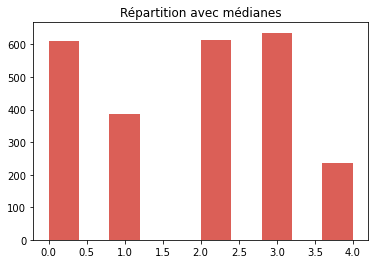

In [13]:
dt_final0 = dataframe0.drop(['server','app','basename'],axis=1)

kmeans0 = KMeans(n_clusters=5)
kmeans0.fit(dt_final0);

dataframe0['kmeans_labels'] = kmeans0.labels_
plt.hist(kmeans0.labels_);
plt.title('Répartition avec médianes');

## Matrice de confusion pour comparaison avec les noms :

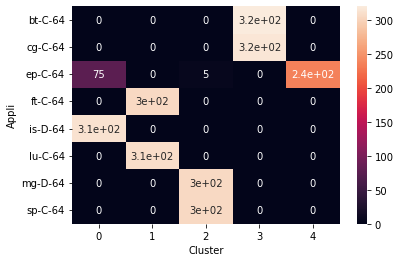

In [5]:
dt_conf = pd.DataFrame(dataframe0[['app','kmeans_labels']])
confusion_matrix = pd.crosstab(dt_conf['app'],dt_conf['kmeans_labels'],rownames=['Appli'],colnames=['Cluster'])

sns.heatmap(confusion_matrix,annot=True)
plt.show()

In [14]:
centroids = kmeans0.cluster_centers_
test = dt_final0.iloc[[0]]
dist = np.zeros(5)
test = np.array(test)
for i in range(5):
    dist[i] = np.linalg.norm(test - centroids[i])
    
print(dist)
print(np.argmin(dist))

[1.52831101e+09 5.59299655e+09 2.82837901e+09 1.76784289e+08
 6.92896924e+09]
3


In [15]:
dataframe0

instructions  cache_references  cache_misses  cache_node  rxp   rxb  \
0     7.842224e+09        22042981.0    11495639.0   7568938.0  1.0  46.0   
1     7.855543e+09        22225553.5    11489391.5   7454344.5  1.0  46.0   
2     7.822922e+09        21907212.5    11449499.0   7465866.0  1.0  46.0   
3     7.869445e+09        22285020.5    11519631.5   7417009.5  1.0  46.0   
4     7.414331e+09        47702489.5     8134739.0   6174563.5  0.0   0.0   
...            ...               ...           ...         ...  ...   ...   
2479  4.899471e+09        79601029.0    15035617.0  10973145.0  1.0  46.0   
2480  2.278001e+09         4347766.0      925702.0    274977.0  0.0   0.0   
2481  2.279445e+09         4442961.0      941241.0    268649.0  0.0   0.0   
2482  2.278816e+09         4288541.0      941335.0    304158.0  0.0   0.0   
2483  2.278424e+09         4045845.0      988975.0    297346.0  0.0   0.0   

      txp  txb      irxp        irxb      itxp        itxb  package-00  \
0     0.0  0.0   20359.0   9383312.0   20311.0   9359432.0   6267013.0   
1     0.0  0.0   20329.5   9354256.5   20165.0   9335531.0   6066269.0   
2     0.0  0.0   20206.0   9287388.0   20116.0   9319303.0   5983963.0   
3     0.0  0.0   20150.0   9321742.0   20232.5   9332778.0   6043533.0   
4     0.0  0.0  117007.5  54107277.5  116595.5  54034330.0   7438579.5   
...   ...  ...       ...         ...       ...         ...         ...   
2479  0.0  0.0    8350.0   4245678.5    8347.0   4245661.0   7592143.0   
2480  0.0  0.0       0.0         0.0       0.0         0.0   4890032.5   
2481  0.0  0.0       0.0         0.0       0.0         0.0   4739673.0   
2482  0.0  0.0       0.0         0.0       0.0         0.0   4735461.0   
2483  0.0  0.0       0.0         0.0       0.0         0.0   4916247.0   

          dram0  package-11      dram1 server  \
0     1242482.0   6181441.0  1281329.0      1   
1     1268523.0   5802476.0  1275668.0      3   
2     1226234.0   6107070.5  1274214.5      4   
3     1258868.5   5941086.0  1275928.0     16   
4     1206711.5   7380718.5  1311975.0      1   
...         ...         ...        ...    ...   
2479  1938663.0   7438702.0  1947200.5     16   
2480   779887.5   4603564.5   818228.5      6   
2481   792861.0   4480701.0   810258.0      7   
2482   764633.0   4476490.0   815704.0      8   
2483   751383.0   4728626.0   788991.0     16   

                                          basename      app   duration  \
0      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.200002   
1      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.200025   
2      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.300036   
3      npb_graoully-1.nancy.grid5000.fr_1637601437  bt-C-64  28.200036   
4      npb_graoully-1.nancy.grid5000.fr_1637601437  cg-C-64  10.800002   
...                                            ...      ...        ...   
2479  npb_graoully-16.nancy.grid5000.fr_1637875436  mg-D-64  31.499966   
2480  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  28.900029   
2481  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  28.900032   
2482  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  29.000056   
2483  npb_graoully-16.nancy.grid5000.fr_1637875436  is-D-64  29.000046   

      kmeans_labels  
0                 3  
1                 3  
2                 3  
3                 3  
4                 3  
...             ...  
2479              2  
2480              1  
2481              1  
2482              1  
2483              1  

[2484 rows x 21 columns]

Le cluster attribué à l'app correspond bien à celui attribué par l'algorithme Kmeans (cluster n°3 dans dataframe0).

## Algos de bandits sur les clusters générés :

Les résultats sont meilleurs sur les clusters générés avec les médianes, on poursuit donc avec ces données là.

In [16]:
dataframe0.head()

instructions  cache_references  cache_misses  cache_node  rxp   rxb  txp  \
0  7.842224e+09        22042981.0    11495639.0   7568938.0  1.0  46.0  0.0   
1  7.855543e+09        22225553.5    11489391.5   7454344.5  1.0  46.0  0.0   
2  7.822922e+09        21907212.5    11449499.0   7465866.0  1.0  46.0  0.0   
3  7.869445e+09        22285020.5    11519631.5   7417009.5  1.0  46.0  0.0   
4  7.414331e+09        47702489.5     8134739.0   6174563.5  0.0   0.0  0.0   

   txb      irxp        irxb      itxp        itxb  package-00      dram0  \
0  0.0   20359.0   9383312.0   20311.0   9359432.0   6267013.0  1242482.0   
1  0.0   20329.5   9354256.5   20165.0   9335531.0   6066269.0  1268523.0   
2  0.0   20206.0   9287388.0   20116.0   9319303.0   5983963.0  1226234.0   
3  0.0   20150.0   9321742.0   20232.5   9332778.0   6043533.0  1258868.5   
4  0.0  117007.5  54107277.5  116595.5  54034330.0   7438579.5  1206711.5   

   package-11      dram1 server                                     basename  \
0   6181441.0  1281329.0      1  npb_graoully-1.nancy.grid5000.fr_1637601437   
1   5802476.0  1275668.0      3  npb_graoully-1.nancy.grid5000.fr_1637601437   
2   6107070.5  1274214.5      4  npb_graoully-1.nancy.grid5000.fr_1637601437   
3   5941086.0  1275928.0     16  npb_graoully-1.nancy.grid5000.fr_1637601437   
4   7380718.5  1311975.0      1  npb_graoully-1.nancy.grid5000.fr_1637601437   

       app   duration  kmeans_labels  
0  bt-C-64  28.200002              3  
1  bt-C-64  28.200025              3  
2  bt-C-64  28.300036              3  
3  bt-C-64  28.200036              3  
4  cg-C-64  10.800002              3

Comparer membres clusters et fréquences obtenues avec noms.
Pour récompenses : récupérer dans les fichiers cleaned avec les blocs de chaques applis.

Création du dataframe de rewards :

In [17]:
rewards = pd.DataFrame(dataframe0[['app','basename']])
m,n = rewards.shape
rewards.head()

app                                     basename
0  bt-C-64  npb_graoully-1.nancy.grid5000.fr_1637601437
1  bt-C-64  npb_graoully-1.nancy.grid5000.fr_1637601437
2  bt-C-64  npb_graoully-1.nancy.grid5000.fr_1637601437
3  bt-C-64  npb_graoully-1.nancy.grid5000.fr_1637601437
4  cg-C-64  npb_graoully-1.nancy.grid5000.fr_1637601437

Récupération des énergies et des durées correspondantes pour chaque application dans chaque expérience et pour toutes les fréquences :

In [18]:
path = '/home/agary/Documents/Data/npb_fast/02_remove_wm/'
energies = np.zeros((13,m))
durations = np.zeros((13,m))

for i in range(m):
                    
    filename = rewards.iat[i,1]+'_cleaned.csv'
    data = pd.read_csv(path+filename,sep=' ')    
    data = data.loc[data['fullname']==rewards.iat[i,0]]
    
    if data.shape[0] > 13 : # lorsqu'une même application soit testée plusieurs fois dans un même fichier
        s = data.shape[0] // 13
        en = list(data['energy'])
        du = list(data['time'])
        for j in range(s):
            en_temp = en[int(j*13):int((j+1)*13)]
            du_temp = du[int(j*13):int((j+1)*13)]
            energies[:,i] = en_temp
            durations[:,i] = du_temp
            
    else :
        energies[:,i] = list(data['energy'])
        durations[:,i] = list(data['time'])
        
energies = np.transpose(energies)
durations = np.transpose(durations)

In [19]:
rewards = pd.concat([rewards,pd.DataFrame(energies)],axis=1)
list_rewards = ['ref_energy','ref_energy.1','ref_energy.2','ref_energy.3','ref_energy.4','ref_energy.5','ref_energy.6','ref_energy.7','ref_energy.8','ref_energy.9','ref_energy.10','ref_energy.11','ref_energy.12']
rewards = rewards.drop(['app','basename'],axis=1)
rewards.columns = list_rewards
rewards.head()

ref_energy  ref_energy.1  ref_energy.2  ref_energy.3  ref_energy.4  \
0  30254.291631  28471.873380  27519.550667  27879.174419  25741.798388   
1  30254.291631  28471.873380  27519.550667  27879.174419  25741.798388   
2  30254.291631  28471.873380  27519.550667  27879.174419  25741.798388   
3  30254.291631  28471.873380  27519.550667  27879.174419  25741.798388   
4   8181.196818   8270.415997   8577.290730   8182.875059   7880.906982   

   ref_energy.5  ref_energy.6  ref_energy.7  ref_energy.8  ref_energy.9  \
0  25985.138005  25310.324588  24841.246939  24072.426322  23655.374708   
1  25985.138005  25310.324588  24841.246939  24072.426322  23655.374708   
2  25985.138005  25310.324588  24841.246939  24072.426322  23655.374708   
3  25985.138005  25310.324588  24841.246939  24072.426322  23655.374708   
4   8043.675105   7920.910401   7790.819135   7341.392173   7715.368501   

   ref_energy.10  ref_energy.11  ref_energy.12  
0   23268.984558   23385.471424   23140.481485  
1   23268.984558   23385.471424   23140.481485  
2   23268.984558   23385.471424   23140.481485  
3   23268.984558   23385.471424   23140.481485  
4    7570.096469    7794.477419    7856.758040

In [20]:
context = pd.get_dummies(dataframe0['kmeans_labels'])
context['duration'] = dataframe0['duration']

context.head()

0  1  2  3  4   duration
0  0  0  0  1  0  28.200002
1  0  0  0  1  0  28.200025
2  0  0  0  1  0  28.300036
3  0  0  0  1  0  28.200036
4  0  0  0  1  0  10.800002

In [21]:
list_durations = ['duration','duration.1','duration.2','duration.3','duration.4','duration.5','duration.6','duration.7','duration.8','duration.9','duration.10','duration.11','duration.12']
durations = pd.DataFrame(durations,columns=list_durations)
durations.head()

duration  duration.1  duration.2  duration.3  duration.4  duration.5  \
0  47.106004   43.105610   41.075902   44.077605   37.112306   36.075376   
1  47.106004   43.105610   41.075902   44.077605   37.112306   36.075376   
2  47.106004   43.105610   41.075902   44.077605   37.112306   36.075376   
3  47.106004   43.105610   41.075902   44.077605   37.112306   36.075376   
4  13.048844   12.025082   17.026125   13.052953   11.042490   12.026580   

   duration.6  duration.7  duration.8  duration.9  duration.10  duration.11  \
0   35.048110   33.058151   31.061808   30.073501    30.061320    29.079343   
1   35.048110   33.058151   31.061808   30.073501    30.061320    29.079343   
2   35.048110   33.058151   31.061808   30.073501    30.061320    29.079343   
3   35.048110   33.058151   31.061808   30.073501    30.061320    29.079343   
4   11.024663   11.004918   10.068871   10.089852    11.026398    10.005981   

   duration.12  
0    28.120202  
1    28.120202  
2    28.120202  
3    28.120202  
4    10.009967

In [22]:
dt = dataframe0['kmeans_labels'].copy()
dt = pd.concat([dt,durations,rewards],axis=1)
dt.head()

kmeans_labels   duration  duration.1  duration.2  duration.3  duration.4  \
0              3  47.106004   43.105610   41.075902   44.077605   37.112306   
1              3  47.106004   43.105610   41.075902   44.077605   37.112306   
2              3  47.106004   43.105610   41.075902   44.077605   37.112306   
3              3  47.106004   43.105610   41.075902   44.077605   37.112306   
4              3  13.048844   12.025082   17.026125   13.052953   11.042490   

   duration.5  duration.6  duration.7  duration.8  duration.9  duration.10  \
0   36.075376   35.048110   33.058151   31.061808   30.073501    30.061320   
1   36.075376   35.048110   33.058151   31.061808   30.073501    30.061320   
2   36.075376   35.048110   33.058151   31.061808   30.073501    30.061320   
3   36.075376   35.048110   33.058151   31.061808   30.073501    30.061320   
4   12.026580   11.024663   11.004918   10.068871   10.089852    11.026398   

   duration.11  duration.12    ref_energy  ref_energy.1  ref_energy.2  \
0    29.079343    28.120202  30254.291631  28471.873380  27519.550667   
1    29.079343    28.120202  30254.291631  28471.873380  27519.550667   
2    29.079343    28.120202  30254.291631  28471.873380  27519.550667   
3    29.079343    28.120202  30254.291631  28471.873380  27519.550667   
4    10.005981    10.009967   8181.196818   8270.415997   8577.290730   

   ref_energy.3  ref_energy.4  ref_energy.5  ref_energy.6  ref_energy.7  \
0  27879.174419  25741.798388  25985.138005  25310.324588  24841.246939   
1  27879.174419  25741.798388  25985.138005  25310.324588  24841.246939   
2  27879.174419  25741.798388  25985.138005  25310.324588  24841.246939   
3  27879.174419  25741.798388  25985.138005  25310.324588  24841.246939   
4   8182.875059   7880.906982   8043.675105   7920.910401   7790.819135   

   ref_energy.8  ref_energy.9  ref_energy.10  ref_energy.11  ref_energy.12  
0  24072.426322  23655.374708   23268.984558   23385.471424   23140.481485  
1  24072.426322  23655.374708   23268.984558   23385.471424   23140.481485  
2  24072.426322  23655.374708   23268.984558   23385.471424   23140.481485  
3  24072.426322  23655.374708   23268.984558   23385.471424   23140.481485  
4   7341.392173   7715.368501    7570.096469    7794.477419    7856.758040

In [23]:
rewards = (-1)*rewards
alloc_linucb = ba.LINUCB(context,rewards)

In [24]:
print('Coefficients estimés')
alloc_linucb[1]

Coefficients estimés


0            1            2            3  \
ref_energy        0.000000     0.000000     0.000000   -37.948782   
ref_energy.1      0.000000     0.000000     0.000000   -35.712989   
ref_energy.2      0.000000     0.000000     0.000000   -34.275530   
ref_energy.3      0.000000     0.000000     0.000000   -34.969525   
ref_energy.4      0.000000     0.000000     0.000000   838.378488   
ref_energy.5      0.000000     0.000000  2337.373076  2185.154734   
ref_energy.6      0.000000  3269.815816   881.724302  2596.636844   
ref_energy.7      0.000000  2045.431973 -1750.859797   611.871637   
ref_energy.8   1133.445802  2707.502828 -3219.040765  -147.886811   
ref_energy.9   1056.533196     0.000000 -1098.848581     0.000000   
ref_energy.10  1210.297429     0.000000  -970.971933  2086.301290   
ref_energy.11  1127.251473     0.000000 -1608.034265     0.000000   
ref_energy.12  1628.837909     0.000000  -334.341199     0.000000   

                         4     duration  
ref_energy        0.000000 -1070.155731  
ref_energy.1      0.000000 -1007.107179  
ref_energy.2      0.000000  -969.998744  
ref_energy.3      0.000000  -986.141847  
ref_energy.4      0.000000  -934.965975  
ref_energy.5      0.000000 -1010.805634  
ref_energy.6      0.000000  -947.443237  
ref_energy.7      0.000000  -860.798051  
ref_energy.8    989.453818  -822.019859  
ref_energy.9   1352.781556  -888.983732  
ref_energy.10  1372.601800  -889.452937  
ref_energy.11  2719.025134  -870.152297  
ref_energy.12     0.000000  -911.148872

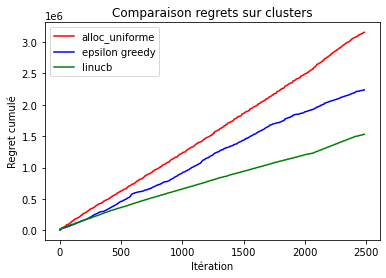

In [26]:
# comparaison regret :
alloc_unif = ba.UniformBandit(rewards)
alloc_eps_greedy = ba.EpsilonGreedy(rewards)

reg_unif = ba.cumulativeRegret(alloc_unif[1],rewards)
reg_eps_greedy = ba.cumulativeRegret(alloc_eps_greedy[1],rewards)
reg_linucb = ba.cumulativeRegret(alloc_linucb[3],rewards)

plt.plot(reg_unif, 'r', label = 'alloc_uniforme');
plt.plot(reg_eps_greedy, 'b', label = 'epsilon greedy');
plt.plot(reg_linucb, 'g', label = 'linucb');
plt.xlabel('Itération');
plt.ylabel('Regret cumulé');
plt.title('Comparaison regrets sur clusters')
plt.legend();
plt.show();

## Calcul de la meilleure fréquence pour chaque cluster :

In [48]:
def calcul_freq(data,res_linucb):

    liste_clusters = [0,1,2,3,4]
    frequences = [1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4]
    
    temps_execution = []
    consommations = []
    best_consos = []
    
    best_freq = [] # On stocke la frequences optimale
    gains = [] # On stocke les gains moyens
    
    for k in range(len(liste_clusters)) :
        clust = liste_clusters[k]
        print('Cluster :', clust)
        
        # Calcul des temps moyens :

        indices_clusters = np.where(data['kmeans_labels'] == clust)[0] #On récupère les indices associés à l'application
        n = data.shape[0]
        temps = np.zeros(13)

        for i in range(n):
            if i in indices_clusters :
                for j in range(13):
                    
                    temps[j] += data.iat[i,j+1]

        temps /= len(indices_clusters)
        temps_execution.append(temps)
        
        # Calcul de la consommation prévue
        
        consos = []
        for i in range(13):
            c = res_linucb.iat[i,k]
            d = res_linucb.iat[i,-1]
        

            energie = abs(c + temps[i]*d)
            consos.append(energie)
            print("Consommation pour " + str(frequences[i]) + " GHz :" + str(energie))
        print('')
        consommations.append(consos)
        indices_min = np.argmin(consos)
        best_consos.append(min(consos))

        best_freq.append(frequences[indices_min])
        
        # Construction du tableau recaptulatif :
        
        consos.remove(best_consos[-1])
        moy = np.mean(consos)

        if moy == 0 :
            gains.append('NA')
        else :
            gains.append(moy - best_consos[-1])
        
    a = np.array([best_freq, best_consos, gains])
    a = np.transpose(a)
    recap = pd.DataFrame(data=a, index=liste_clusters, columns=['Frequence optimale', 'Consommation optimale', 'Gain moyen'])
    return [recap, temps_execution, consommations]

In [49]:
recap,temps_execution,consommations = calcul_freq(dt,alloc_linucb[1])

Cluster : 0
Consommation pour 1.2 GHz :32333.969870158944
Consommation pour 1.3 GHz :28557.507235671994
Consommation pour 1.4 GHz :26247.54860567695
Consommation pour 1.5 GHz :25918.907278529885
Consommation pour 1.6 GHz :22181.416298641667
Consommation pour 1.7 GHz :21778.143013633227
Consommation pour 1.8 GHz :18962.10090246277
Consommation pour 1.9 GHz :18511.884984823897
Consommation pour 2.0 GHz :17823.643853200192
Consommation pour 2.1 GHz :18429.50410597104
Consommation pour 2.2 GHz :15868.703596554422
Consommation pour 2.3 GHz :16933.30806569756
Consommation pour 2.4 GHz :17561.83111423923

Cluster : 1
Consommation pour 1.2 GHz :37981.91602682071
Consommation pour 1.3 GHz :33726.280560104475
Consommation pour 1.4 GHz :31155.283803240858
Consommation pour 1.5 GHz :30778.020733922316
Consommation pour 1.6 GHz :27784.218426566058
Consommation pour 1.7 GHz :29290.49259522276
Consommation pour 1.8 GHz :23615.831592689286
Consommation pour 1.9 GHz :21740.925442851123
Consommation pou

In [50]:
print('Recapitulatif des resultats :')
recap

Recapitulatif des resultats :


Frequence optimale  Consommation optimale   Gain moyen
0                 2.2           15868.703597  6234.610181
1                 2.0           19389.230174  7754.128615
2                 2.4           24862.297297  3863.102725
3                 2.4           14314.629329  6055.262637
4                 2.3            3985.189372  5037.472776